In [13]:
import numpy as np
import cv2
import  imutils
import sys
import pytesseract
import pandas as pd
import time

import matplotlib.pyplot as plt

In [14]:
def shear_X(image, shear):
    h, w = image.shape[:2]
    src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
    dest = src.copy()
    dest[:,0] += (shear / h * (h - src[:,1])).astype(np.float32)
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(image, affine, (w, h))
def shear_Y(image, shear):
    h, w = image.shape[:2]
    src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
    dest = src.copy()
    dest[:,1] += (shear / w * (w - src[:,0])).astype(np.float32)
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(image, affine, (w, h))

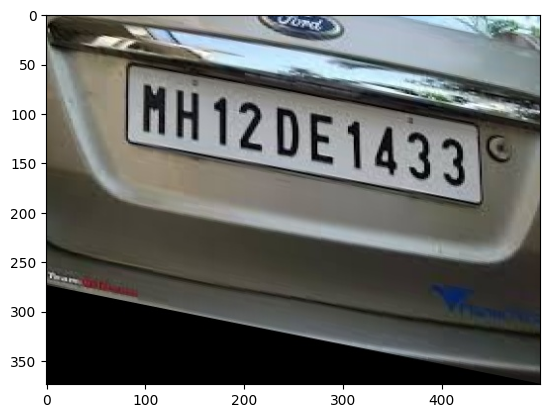

In [15]:
image = cv2.imread('imgs/number_plate1.jpg')
image = imutils.resize(image, width=500)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

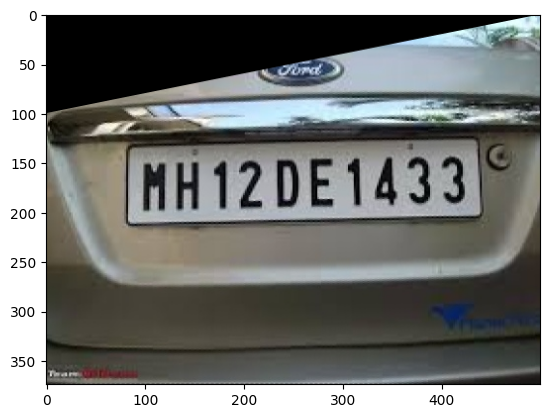

In [16]:
sheared= shear_Y(image, 100)
plt.imshow(cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB))
plt.show()

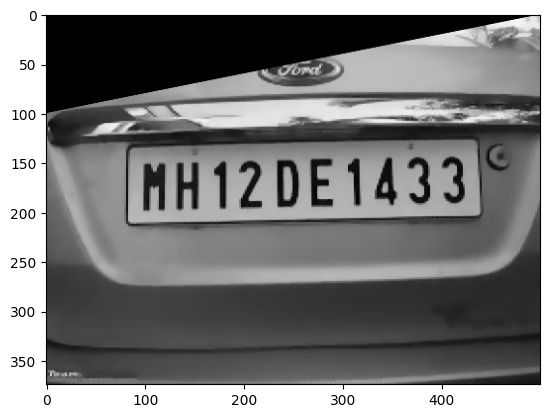

In [17]:
gray = cv2.cvtColor(sheared, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.gray()

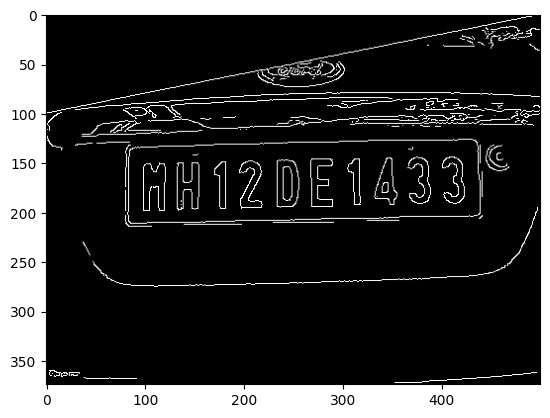

In [18]:
edged = cv2.Canny(gray, 170, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.gray()

In [19]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 

NumberPlateCnt=
[[[436 133]]

 [[ 90 134]]

 [[ 83 209]]

 [[431 204]]]


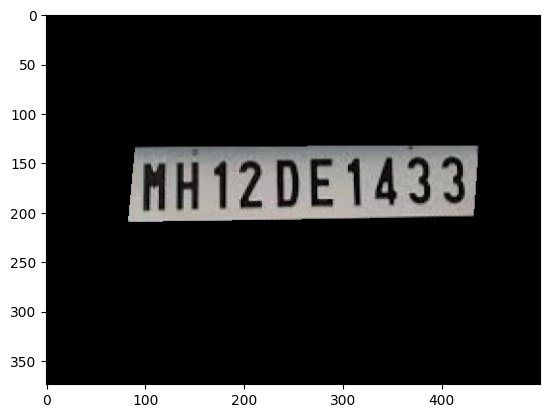

In [20]:
NumberPlateCnt = None 
count = 0
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        NumberPlateCnt = approx 
        break
print(f"NumberPlateCnt=\n{NumberPlateCnt}")
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255, -1)
new_image = cv2.bitwise_and(sheared, sheared,mask=mask)

plt.imshow(new_image)
plt.gray()

In [21]:
# Configuration for tesseract
config = ('-l eng --oem 1 --psm 3')
# Run tesseract OCR on image (apt install tesseract-ocr)
text = pytesseract.image_to_string(new_image, config=config)

print(text)

HH12DE1433

